In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
arpajon = pd.read_csv("ARPAJON.csv")
chilly = pd.read_csv("CHILLY.csv")
corbeil = pd.read_csv("CORBEIL.csv")
monygeron = pd.read_csv("MONYGERON.csv")
turnover_chilly = pd.read_excel("2023_total.xlsx")

In [3]:
row_to_T = {}
for i in range(turnover_chilly.shape[0]):
    row_to_T[i] = turnover_chilly.iloc[i,4:].to_frame()
    row_to_T[i].columns=['Transaction']

In [4]:
import pandas as pd

# Define the start and end dates
start_date = '2023-01-01 00:00'
end_date = '2023-12-31 23:00'  # End of the year

# Create a date range with hourly frequency
date_range = pd.date_range(start=start_date, end=end_date, freq='h')

# Create the DataFrame with the specified index
dataset = pd.DataFrame(columns=['DateTime', 'Transaction'])
dataset['DateTime'] = date_range

# Filter out rows corresponding to February and December
dataset = dataset[~dataset['DateTime'].dt.month.isin([2, 12])]



In [5]:
dataset.iloc[0:24,1] = row_to_T[0].iloc[:,0]

In [6]:
k1 = pd.read_csv("Chilly Kitchen/kitchen January.csv")
k3 = pd.read_csv("Chilly Kitchen/kitchen March.csv")
k4 = pd.read_csv("Chilly Kitchen/kitchen April.csv")
k5 = pd.read_csv("Chilly Kitchen/kitchen May.csv")
k6 = pd.read_csv("Chilly Kitchen/kitchen June.csv")
k7 = pd.read_csv("Chilly Kitchen/kitchen July.csv")
k8 = pd.read_csv("Chilly Kitchen/kitchen August.csv")
k9 = pd.read_csv("Chilly Kitchen/kitchen September.csv")
k10 = pd.read_csv("Chilly Kitchen/kitchen October.csv")
k11 = pd.read_csv("Chilly Kitchen/kitchen November.csv")

In [7]:
k1['DateTime'] = pd.to_datetime(k1['DateTime'])
k3['DateTime'] = pd.to_datetime(k3['DateTime'])
k4['DateTime'] = pd.to_datetime(k4['DateTime'])
k5['DateTime'] = pd.to_datetime(k5['DateTime'])
k6['DateTime'] = pd.to_datetime(k6['DateTime'])
k7['DateTime'] = pd.to_datetime(k7['DateTime'])
k8['DateTime'] = pd.to_datetime(k8['DateTime'])
k9['DateTime'] = pd.to_datetime(k9['DateTime'])
k10['DateTime'] = pd.to_datetime(k10['DateTime'])
k11['DateTime'] = pd.to_datetime(k11['DateTime'])
k = pd.concat([k1,k3,k4,k5,k6,k7,k8,k9,k10,k11])


In [8]:
dataset = pd.merge(dataset,k, on = 'DateTime', how = 'left')

Here we get a dataset contains the transaction data and energy consumption data hourly in 2023

In [9]:
dataset = dataset.fillna(0)

/var/folders/sy/vmc9d9hj20b8m5tcq23j8d7r0000gn/T/ipykernel_53833/2180644426.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.fillna(0)


In [10]:
dataset.to_csv("turnover_energy.csv")

In [11]:
sub_datasets = [dataset.iloc[i::24] for i in range(24)]

# recommend machine open sitation based on transaction

In [12]:
mean_transaction_target = [] 
for i in range(10,23):
    idx = np.where(sub_datasets[i]['Friteuse Frites 1 (Wh)']<0.64*sub_datasets[i]["Friteuse Frites 1 (Wh)"].mean())
    mean_transaction_target.append(sub_datasets[i+1]['Transaction'].iloc[idx[0]].mean())
for i in range(10,23):
    print(f" For hour{i}, Friteuse Frites 1 should close or run at a low power when the transaction of hour {i+1} is under ", mean_transaction_target[i-10])

 For hour10, Friteuse Frites 1 should close or run at a low power when the transaction of hour 11 is under  21.672222222222224
 For hour11, Friteuse Frites 1 should close or run at a low power when the transaction of hour 12 is under  0.0
 For hour12, Friteuse Frites 1 should close or run at a low power when the transaction of hour 13 is under  0.0
 For hour13, Friteuse Frites 1 should close or run at a low power when the transaction of hour 14 is under  0.0
 For hour14, Friteuse Frites 1 should close or run at a low power when the transaction of hour 15 is under  0.0
 For hour15, Friteuse Frites 1 should close or run at a low power when the transaction of hour 16 is under  11.269183673469389
 For hour16, Friteuse Frites 1 should close or run at a low power when the transaction of hour 17 is under  9.251836734693876
 For hour17, Friteuse Frites 1 should close or run at a low power when the transaction of hour 18 is under  0.0
 For hour18, Friteuse Frites 1 should close or run at a low 

In [13]:
mean_transaction_target = [] 
for i in range(10,23):
    idx = np.where(sub_datasets[i]['Friteuse Frites 2 (Wh)']<0.64*sub_datasets[i]["Friteuse Frites 2 (Wh)"].mean())
    mean_transaction_target.append(sub_datasets[i+1]['Transaction'].iloc[idx[0]].mean())
for i in range(10,23):
    print(f" For hour{i}, Friteuse Frites 2 should close or run at a low power when the transaction of hour {i+1} is under ", mean_transaction_target[i-10])

 For hour10, Friteuse Frites 2 should close or run at a low power when the transaction of hour 11 is under  1.9122549019607844
 For hour11, Friteuse Frites 2 should close or run at a low power when the transaction of hour 12 is under  6.132555555555555
 For hour12, Friteuse Frites 2 should close or run at a low power when the transaction of hour 13 is under  6.221292134831462
 For hour13, Friteuse Frites 2 should close or run at a low power when the transaction of hour 14 is under  3.4825
 For hour14, Friteuse Frites 2 should close or run at a low power when the transaction of hour 15 is under  3.152200956937799
 For hour15, Friteuse Frites 2 should close or run at a low power when the transaction of hour 16 is under  2.2355870445344133
 For hour16, Friteuse Frites 2 should close or run at a low power when the transaction of hour 17 is under  1.642536231884058
 For hour17, Friteuse Frites 2 should close or run at a low power when the transaction of hour 18 is under  5.074185022026431
 

In [14]:
mean_transaction_target = [] 
for i in range(10,23):
    idx = np.where(sub_datasets[i]['Friteuse Frites 3 (Wh)']<0.64*sub_datasets[i]["Friteuse Frites 3 (Wh)"].mean())
    mean_transaction_target.append(sub_datasets[i+1]['Transaction'].iloc[idx[0]].mean())
for i in range(10,23):
    print(f" For hour{i}, Friteuse Frites 3 should close or run at a low power when the transaction of hour {i+1} is under ", mean_transaction_target[i-10])

 For hour10, Friteuse Frites 3 should close or run at a low power when the transaction of hour 11 is under  3.5463636363636364
 For hour11, Friteuse Frites 3 should close or run at a low power when the transaction of hour 12 is under  0.0
 For hour12, Friteuse Frites 3 should close or run at a low power when the transaction of hour 13 is under  0.0
 For hour13, Friteuse Frites 3 should close or run at a low power when the transaction of hour 14 is under  0.0
 For hour14, Friteuse Frites 3 should close or run at a low power when the transaction of hour 15 is under  0.0
 For hour15, Friteuse Frites 3 should close or run at a low power when the transaction of hour 16 is under  0.0
 For hour16, Friteuse Frites 3 should close or run at a low power when the transaction of hour 17 is under  0.0
 For hour17, Friteuse Frites 3 should close or run at a low power when the transaction of hour 18 is under  0.0
 For hour18, Friteuse Frites 3 should close or run at a low power when the transaction of

In [15]:
mean_transaction_target = [] 
for i in range(10,23):
    idx = np.where(sub_datasets[i]['Friteuse Fish (Wh)']<0.64*sub_datasets[i]["Friteuse Fish (Wh)"].mean())
    mean_transaction_target.append(sub_datasets[i+1]['Transaction'].iloc[idx[0]].mean())
for i in range(10,23):
    print(f" For hour{i}, Friteuse Fish should close or run at a low power when the transaction of hour {i+1} is under ", mean_transaction_target[i-10])

 For hour10, Friteuse Fish should close or run at a low power when the transaction of hour 11 is under  22.947058823529414
 For hour11, Friteuse Fish should close or run at a low power when the transaction of hour 12 is under  0.0
 For hour12, Friteuse Fish should close or run at a low power when the transaction of hour 13 is under  0.0
 For hour13, Friteuse Fish should close or run at a low power when the transaction of hour 14 is under  0.0
 For hour14, Friteuse Fish should close or run at a low power when the transaction of hour 15 is under  0.0
 For hour15, Friteuse Fish should close or run at a low power when the transaction of hour 16 is under  0.0
 For hour16, Friteuse Fish should close or run at a low power when the transaction of hour 17 is under  0.0
 For hour17, Friteuse Fish should close or run at a low power when the transaction of hour 18 is under  0.0
 For hour18, Friteuse Fish should close or run at a low power when the transaction of hour 19 is under  0.0
 For hour19, 

In [16]:
mean_transaction_target = [] 
for i in range(10,23):
    idx = np.where(sub_datasets[i]['Friteuse HP Poulet 1 (Wh)']<0.64*sub_datasets[i]["Friteuse HP Poulet 1 (Wh)"].mean())
    mean_transaction_target.append(sub_datasets[i+1]['Transaction'].iloc[idx[0]].mean())
for i in range(10,23):
    print(f" For hour{i}, Friteuse HP Poulet 1 should close or run at a low power when the transaction of hour {i+1} is under ", mean_transaction_target[i-10])

 For hour10, Friteuse HP Poulet 1 should close or run at a low power when the transaction of hour 11 is under  1.7731818181818182
 For hour11, Friteuse HP Poulet 1 should close or run at a low power when the transaction of hour 12 is under  5.086912442396313
 For hour12, Friteuse HP Poulet 1 should close or run at a low power when the transaction of hour 13 is under  5.056575342465754
 For hour13, Friteuse HP Poulet 1 should close or run at a low power when the transaction of hour 14 is under  2.737336244541485
 For hour14, Friteuse HP Poulet 1 should close or run at a low power when the transaction of hour 15 is under  2.8154273504273504
 For hour15, Friteuse HP Poulet 1 should close or run at a low power when the transaction of hour 16 is under  2.329915611814346
 For hour16, Friteuse HP Poulet 1 should close or run at a low power when the transaction of hour 17 is under  1.9047899159663864
 For hour17, Friteuse HP Poulet 1 should close or run at a low power when the transaction of h

In [17]:
mean_transaction_target = [] 
for i in range(10,23):
    idx = np.where(sub_datasets[i]['Friteuse HP Poulet 2 (Wh)']<0.64*sub_datasets[i]["Friteuse HP Poulet 2 (Wh)"].mean())
    mean_transaction_target.append(sub_datasets[i+1]['Transaction'].iloc[idx[0]].mean())
for i in range(10,23):
    print(f" For hour{i}, Friteuse HP Poulet 2 should close or run at a low power when the transaction of hour {i+1} is under ", mean_transaction_target[i-10])

 For hour10, Friteuse HP Poulet 2 should close or run at a low power when the transaction of hour 11 is under  4.757317073170732
 For hour11, Friteuse HP Poulet 2 should close or run at a low power when the transaction of hour 12 is under  0.0
 For hour12, Friteuse HP Poulet 2 should close or run at a low power when the transaction of hour 13 is under  11.535312500000002
 For hour13, Friteuse HP Poulet 2 should close or run at a low power when the transaction of hour 14 is under  0.0
 For hour14, Friteuse HP Poulet 2 should close or run at a low power when the transaction of hour 15 is under  0.0
 For hour15, Friteuse HP Poulet 2 should close or run at a low power when the transaction of hour 16 is under  0.0
 For hour16, Friteuse HP Poulet 2 should close or run at a low power when the transaction of hour 17 is under  0.0
 For hour17, Friteuse HP Poulet 2 should close or run at a low power when the transaction of hour 18 is under  0.0
 For hour18, Friteuse HP Poulet 2 should close or r

In [18]:
mean_transaction_target = [] 
for i in range(10,23):
    idx = np.where(sub_datasets[i]['Friteuse Poulet 3 (Wh)']<0.64*sub_datasets[i]["Friteuse Poulet 3 (Wh)"].mean())
    mean_transaction_target.append(sub_datasets[i+1]['Transaction'].iloc[idx[0]].mean())
for i in range(10,23):
    print(f" For hour{i}, Friteuse Poulet 3 should close or run at a low power when the transaction of hour {i+1} is under ", mean_transaction_target[i-10])

 For hour10, Friteuse Poulet 3 should close or run at a low power when the transaction of hour 11 is under  48.7625
 For hour11, Friteuse Poulet 3 should close or run at a low power when the transaction of hour 12 is under  0.0
 For hour12, Friteuse Poulet 3 should close or run at a low power when the transaction of hour 13 is under  23.56148936170213
 For hour13, Friteuse Poulet 3 should close or run at a low power when the transaction of hour 14 is under  0.0
 For hour14, Friteuse Poulet 3 should close or run at a low power when the transaction of hour 15 is under  0.0
 For hour15, Friteuse Poulet 3 should close or run at a low power when the transaction of hour 16 is under  0.0
 For hour16, Friteuse Poulet 3 should close or run at a low power when the transaction of hour 17 is under  0.0
 For hour17, Friteuse Poulet 3 should close or run at a low power when the transaction of hour 18 is under  0.0
 For hour18, Friteuse Poulet 3 should close or run at a low power when the transaction

In [19]:
mean_transaction_target = [] 
for i in range(10,23):
    idx = np.where(sub_datasets[i]['Friteuse Poulet 4 (Wh)']<0.64*sub_datasets[i]["Friteuse Poulet 4 (Wh)"].mean())
    mean_transaction_target.append(sub_datasets[i+1]['Transaction'].iloc[idx[0]].mean())
for i in range(10,23):
    print(f" For hour{i}, Friteuse Poulet 4 should close or run at a low power when the transaction of hour {i+1} is under ", mean_transaction_target[i-10])

 For hour10, Friteuse Poulet 4 should close or run at a low power when the transaction of hour 11 is under  7.649019607843138
 For hour11, Friteuse Poulet 4 should close or run at a low power when the transaction of hour 12 is under  10.822156862745096
 For hour12, Friteuse Poulet 4 should close or run at a low power when the transaction of hour 13 is under  17.57761904761905
 For hour13, Friteuse Poulet 4 should close or run at a low power when the transaction of hour 14 is under  6.206435643564356
 For hour14, Friteuse Poulet 4 should close or run at a low power when the transaction of hour 15 is under  6.334711538461538
 For hour15, Friteuse Poulet 4 should close or run at a low power when the transaction of hour 16 is under  4.679576271186441
 For hour16, Friteuse Poulet 4 should close or run at a low power when the transaction of hour 17 is under  4.121272727272727
 For hour17, Friteuse Poulet 4 should close or run at a low power when the transaction of hour 18 is under  10.969904

In [20]:
mean_transaction_target = [] 
for i in range(10,23):
    idx = np.where(sub_datasets[i]['Friteuse Poulet 5 (Wh)']<0.64*sub_datasets[i]["Friteuse Poulet 5 (Wh)"].mean())
    mean_transaction_target.append(sub_datasets[i+1]['Transaction'].iloc[idx[0]].mean())
for i in range(10,23):
    print(f" For hour{i}, Friteuse Poulet 5 should close or run at a low power when the transaction of hour {i+1} is under ", mean_transaction_target[i-10])

 For hour10, Friteuse Poulet 5 should close or run at a low power when the transaction of hour 11 is under  1.517898832684825
 For hour11, Friteuse Poulet 5 should close or run at a low power when the transaction of hour 12 is under  0.0
 For hour12, Friteuse Poulet 5 should close or run at a low power when the transaction of hour 13 is under  0.0
 For hour13, Friteuse Poulet 5 should close or run at a low power when the transaction of hour 14 is under  0.0
 For hour14, Friteuse Poulet 5 should close or run at a low power when the transaction of hour 15 is under  0.0
 For hour15, Friteuse Poulet 5 should close or run at a low power when the transaction of hour 16 is under  0.0
 For hour16, Friteuse Poulet 5 should close or run at a low power when the transaction of hour 17 is under  0.0
 For hour17, Friteuse Poulet 5 should close or run at a low power when the transaction of hour 18 is under  0.0
 For hour18, Friteuse Poulet 5 should close or run at a low power when the transaction of 

# --------------------------------------------------

# ---------------------------------------------------------------------------

## For the presentation 4.17

Accoring to the past data, we assume that each of the cooking machine can be run at a full power of:
Friteuse Poulet 10kw
Friteuse HP Poulet 10kw
Friteuse Frites 10kw

In [42]:
# If we consider the perfect situation:
mean_energy_consumption = [] 
for i in range(0,24):
    fp = sum([sub_datasets[i]["Friteuse Poulet 5 (Wh)"].mean(),sub_datasets[i]["Friteuse Poulet 4 (Wh)"].mean(),sub_datasets[i]["Friteuse Poulet 3 (Wh)"].mean()])
    mean_energy_consumption.append(fp)
for i in range(0,24):    
    if mean_energy_consumption[i] <= 1000:
        print(f" For hour{i}, Friteuse Poulet at hour {i} should open 0 machine")
    elif mean_energy_consumption[i] <= 10000:
        print(f" For hour{i}, Friteuse Poulet at hour {i} should open 1 machine")
    elif mean_energy_consumption[i] <= 20000:
        print(f" For hour{i}, Friteuse Poulet at hour {i} should open 2 machines")
    else:
        print(print(f" For hour{i}, Friteuse Poulet at hour {i} should open 3 machines"))

 For hour0, Friteuse Poulet at hour 0 should open 0 machine
 For hour1, Friteuse Poulet at hour 1 should open 0 machine
 For hour2, Friteuse Poulet at hour 2 should open 0 machine
 For hour3, Friteuse Poulet at hour 3 should open 0 machine
 For hour4, Friteuse Poulet at hour 4 should open 0 machine
 For hour5, Friteuse Poulet at hour 5 should open 0 machine
 For hour6, Friteuse Poulet at hour 6 should open 0 machine
 For hour7, Friteuse Poulet at hour 7 should open 0 machine
 For hour8, Friteuse Poulet at hour 8 should open 0 machine
 For hour9, Friteuse Poulet at hour 9 should open 0 machine
 For hour10, Friteuse Poulet at hour 10 should open 2 machines
 For hour11, Friteuse Poulet at hour 11 should open 1 machine
 For hour12, Friteuse Poulet at hour 12 should open 1 machine
 For hour13, Friteuse Poulet at hour 13 should open 1 machine
 For hour14, Friteuse Poulet at hour 14 should open 1 machine
 For hour15, Friteuse Poulet at hour 15 should open 1 machine
 For hour16, Friteuse Poule

In [43]:
# If we give some space:
mean_energy_consumption = [] 
for i in range(0,24):
    fp = sum([sub_datasets[i]["Friteuse Poulet 5 (Wh)"].mean(),sub_datasets[i]["Friteuse Poulet 4 (Wh)"].mean(),sub_datasets[i]["Friteuse Poulet 3 (Wh)"].mean()])
    mean_energy_consumption.append(fp)
for i in range(0,24):    
    if mean_energy_consumption[i] <= 1000:
        print(f" For hour{i}, Friteuse Poulet at hour {i} should open 0 machine")
    elif mean_energy_consumption[i] <= 7000:
        print(f" For hour{i}, Friteuse Poulet at hour {i} should open 1 machine")
    elif mean_energy_consumption[i] <= 14000:
        print(f" For hour{i}, Friteuse Poulet at hour {i} should open 2 machines")
    else:
        print(print(f" For hour{i}, Friteuse Poulet at hour {i} should open 3 machines"))

 For hour0, Friteuse Poulet at hour 0 should open 0 machine
 For hour1, Friteuse Poulet at hour 1 should open 0 machine
 For hour2, Friteuse Poulet at hour 2 should open 0 machine
 For hour3, Friteuse Poulet at hour 3 should open 0 machine
 For hour4, Friteuse Poulet at hour 4 should open 0 machine
 For hour5, Friteuse Poulet at hour 5 should open 0 machine
 For hour6, Friteuse Poulet at hour 6 should open 0 machine
 For hour7, Friteuse Poulet at hour 7 should open 0 machine
 For hour8, Friteuse Poulet at hour 8 should open 0 machine
 For hour9, Friteuse Poulet at hour 9 should open 0 machine
 For hour10, Friteuse Poulet at hour 10 should open 2 machines
 For hour11, Friteuse Poulet at hour 11 should open 1 machine
 For hour12, Friteuse Poulet at hour 12 should open 2 machines
 For hour13, Friteuse Poulet at hour 13 should open 1 machine
 For hour14, Friteuse Poulet at hour 14 should open 1 machine
 For hour15, Friteuse Poulet at hour 15 should open 1 machine
 For hour16, Friteuse Poul

In [44]:
# If we consider the perfect situation:
mean_energy_consumption = [] 
for i in range(0,24):
    fp = sum([sub_datasets[i]["Friteuse HP Poulet 1 (Wh)"].mean(),sub_datasets[i]["Friteuse HP Poulet 2 (Wh)"].mean()])
    mean_energy_consumption.append(fp)
for i in range(0,24):    
    if mean_energy_consumption[i] <= 1000:
        print(f" For hour{i}, Friteuse HP Poulet at hour {i} should open 0 machine")
    elif mean_energy_consumption[i] <= 10000:
        print(f" For hour{i}, Friteuse HP Poulet at hour {i} should open 1 machine")
    else:
        print(f" For hour{i}, Friteuse HP Poulet at hour {i} should open 2 machines")

 For hour0, Friteuse HP Poulet at hour 0 should open 0 machine
 For hour1, Friteuse HP Poulet at hour 1 should open 0 machine
 For hour2, Friteuse HP Poulet at hour 2 should open 0 machine
 For hour3, Friteuse HP Poulet at hour 3 should open 0 machine
 For hour4, Friteuse HP Poulet at hour 4 should open 0 machine
 For hour5, Friteuse HP Poulet at hour 5 should open 0 machine
 For hour6, Friteuse HP Poulet at hour 6 should open 0 machine
 For hour7, Friteuse HP Poulet at hour 7 should open 0 machine
 For hour8, Friteuse HP Poulet at hour 8 should open 0 machine
 For hour9, Friteuse HP Poulet at hour 9 should open 0 machine
 For hour10, Friteuse HP Poulet at hour 10 should open 1 machine
 For hour11, Friteuse HP Poulet at hour 11 should open 1 machine
 For hour12, Friteuse HP Poulet at hour 12 should open 1 machine
 For hour13, Friteuse HP Poulet at hour 13 should open 1 machine
 For hour14, Friteuse HP Poulet at hour 14 should open 1 machine
 For hour15, Friteuse HP Poulet at hour 15 sh

In [50]:
# If we give some space:
mean_energy_consumption = [] 
for i in range(0,24):
    fp = sum([sub_datasets[i]["Friteuse HP Poulet 1 (Wh)"].mean(),sub_datasets[i]["Friteuse HP Poulet 2 (Wh)"].mean()])
    mean_energy_consumption.append(fp)
    #print(fp)
for i in range(0,24):    
    if mean_energy_consumption[i] <= 1000:
        print(f" For hour{i}, Friteuse HP Poulet at hour {i} should open 0 machine")
    elif mean_energy_consumption[i] <= 7000:
        print(f" For hour{i}, Friteuse HP Poulet at hour {i} should open 1 machine")
    else:
        print(f" For hour{i}, Friteuse HP Poulet at hour {i} should open 2 machines")

 For hour0, Friteuse HP Poulet at hour 0 should open 0 machine
 For hour1, Friteuse HP Poulet at hour 1 should open 0 machine
 For hour2, Friteuse HP Poulet at hour 2 should open 0 machine
 For hour3, Friteuse HP Poulet at hour 3 should open 0 machine
 For hour4, Friteuse HP Poulet at hour 4 should open 0 machine
 For hour5, Friteuse HP Poulet at hour 5 should open 0 machine
 For hour6, Friteuse HP Poulet at hour 6 should open 0 machine
 For hour7, Friteuse HP Poulet at hour 7 should open 0 machine
 For hour8, Friteuse HP Poulet at hour 8 should open 0 machine
 For hour9, Friteuse HP Poulet at hour 9 should open 0 machine
 For hour10, Friteuse HP Poulet at hour 10 should open 1 machine
 For hour11, Friteuse HP Poulet at hour 11 should open 1 machine
 For hour12, Friteuse HP Poulet at hour 12 should open 1 machine
 For hour13, Friteuse HP Poulet at hour 13 should open 1 machine
 For hour14, Friteuse HP Poulet at hour 14 should open 1 machine
 For hour15, Friteuse HP Poulet at hour 15 sh

So for the Friteuse HP it is the same. open 1 machine since 10.

In [53]:
# If we consider the perfect situation:
mean_energy_consumption = [] 
for i in range(0,24):
    fp = sum([sub_datasets[i]["Friteuse Frites 1 (Wh)"].mean(),sub_datasets[i]["Friteuse Frites 2 (Wh)"].mean(),sub_datasets[i]["Friteuse Frites 3 (Wh)"].mean()])
    mean_energy_consumption.append(fp)
for i in range(0,24):    
    if mean_energy_consumption[i] <= 1000:
        print(f" For hour{i}, Friteuse Frites at hour {i} should open 0 machine")
    elif mean_energy_consumption[i] <= 10000:
        print(f" For hour{i}, Friteuse Frites at hour {i} should open 1 machine")
    elif mean_energy_consumption[i] <= 20000:
        print(f" For hour{i}, Friteuse Frites at hour {i} should open 2 machines")
    else:
         print(f" For hour{i}, Friteuse Frites at hour {i} should open 3 machines")

 For hour0, Friteuse Frites at hour 0 should open 0 machine
 For hour1, Friteuse Frites at hour 1 should open 0 machine
 For hour2, Friteuse Frites at hour 2 should open 0 machine
 For hour3, Friteuse Frites at hour 3 should open 0 machine
 For hour4, Friteuse Frites at hour 4 should open 0 machine
 For hour5, Friteuse Frites at hour 5 should open 0 machine
 For hour6, Friteuse Frites at hour 6 should open 0 machine
 For hour7, Friteuse Frites at hour 7 should open 0 machine
 For hour8, Friteuse Frites at hour 8 should open 0 machine
 For hour9, Friteuse Frites at hour 9 should open 0 machine
 For hour10, Friteuse Frites at hour 10 should open 1 machine
 For hour11, Friteuse Frites at hour 11 should open 1 machine
 For hour12, Friteuse Frites at hour 12 should open 1 machine
 For hour13, Friteuse Frites at hour 13 should open 1 machine
 For hour14, Friteuse Frites at hour 14 should open 1 machine
 For hour15, Friteuse Frites at hour 15 should open 1 machine
 For hour16, Friteuse Frites

In [54]:
# If we give some space:
mean_energy_consumption = [] 
for i in range(0,24):
    fp = sum([sub_datasets[i]["Friteuse Frites 1 (Wh)"].mean(),sub_datasets[i]["Friteuse Frites 2 (Wh)"].mean(),sub_datasets[i]["Friteuse Frites 3 (Wh)"].mean()])
    mean_energy_consumption.append(fp)
for i in range(0,24):    
    if mean_energy_consumption[i] <= 1000:
        print(f" For hour{i}, Friteuse Frites at hour {i} should open 0 machine")
    elif mean_energy_consumption[i] <= 7000:
        print(f" For hour{i}, Friteuse Frites at hour {i} should open 1 machine")
    elif mean_energy_consumption[i] <= 14000:
        print(f" For hour{i}, Friteuse Frites at hour {i} should open 2 machines")
    else:
         print(f" For hour{i}, Friteuse Frites at hour {i} should open 3 machines")

 For hour0, Friteuse Frites at hour 0 should open 0 machine
 For hour1, Friteuse Frites at hour 1 should open 0 machine
 For hour2, Friteuse Frites at hour 2 should open 0 machine
 For hour3, Friteuse Frites at hour 3 should open 0 machine
 For hour4, Friteuse Frites at hour 4 should open 0 machine
 For hour5, Friteuse Frites at hour 5 should open 0 machine
 For hour6, Friteuse Frites at hour 6 should open 0 machine
 For hour7, Friteuse Frites at hour 7 should open 0 machine
 For hour8, Friteuse Frites at hour 8 should open 0 machine
 For hour9, Friteuse Frites at hour 9 should open 0 machine
 For hour10, Friteuse Frites at hour 10 should open 1 machine
 For hour11, Friteuse Frites at hour 11 should open 1 machine
 For hour12, Friteuse Frites at hour 12 should open 2 machines
 For hour13, Friteuse Frites at hour 13 should open 1 machine
 For hour14, Friteuse Frites at hour 14 should open 1 machine
 For hour15, Friteuse Frites at hour 15 should open 1 machine
 For hour16, Friteuse Frite

# ----------------------------------------------------------

In [21]:
column_values = {}
column_var = {}
column_max = {}
# Iterate over sub_datasets
for i, data in enumerate(sub_datasets):
    # Iterate over columns in each dataset
    for c in data.columns[1:]:
        # Generate variable name dynamically
        variable_name = f'{c}'
        # Store column values in the dictionary
        if variable_name not in column_values:
            column_values[variable_name] = []
            column_var[variable_name] = []
            column_max[variable_name] = []
        column_values[variable_name].append(data[c].mean())
        column_var[variable_name].append(data[c].var())
        column_max[variable_name].append(data[c].max())

In [22]:
max_MAC = column_max['Maintien au chaud HC1 (Wh)']
max_FISH = column_max['Friteuse Fish (Wh)']
max_FRITES1 = column_max['Friteuse Frites 1 (Wh)']
max_FRITES2 = column_max['Friteuse Frites 2 (Wh)']
max_FRITES3 = column_max['Friteuse Frites 3 (Wh)']
max_HP_POULET1 = column_max['Friteuse HP Poulet 1 (Wh)']
max_HP_POULET2 = column_max['Friteuse HP Poulet 2 (Wh)']
max_POULET3 = column_max['Friteuse Poulet 3 (Wh)'] 
max_POULET4 = column_max['Friteuse Poulet 4 (Wh)'] 
max_POULET5 = column_max['Friteuse Poulet 5 (Wh)']
max_COOKIES = column_max['Four Cookies (Wh)']

In [37]:
pd.DataFrame(sub_datasets[18])

,DateTime,Transaction,Maintien au chaud HC1 (Wh),Friteuse Fish (Wh),Friteuse HP Poulet 2 (Wh),Friteuse HP Poulet 1 (Wh),Friteuse Poulet 3 (Wh),Friteuse Frites 1 (Wh),Inconnu et négligeable (Wh),Friteuse Poulet 5 (Wh),Friteuse Frites 3 (Wh),Four Cookies (Wh),Friteuse Poulet 4 (Wh),Friteuse Frites 2 (Wh)
18,2023-01-01 18:00:00,1151.84,643.97,917.7,4291.8,89.7,3567.30,3994.95,0.0,3332.70,1938.90,2421.9,0.00,27.6
42,2023-01-02 18:00:00,0.00,650.84,1580.1,4305.6,89.7,3160.05,4567.53,0.0,7058.67,1469.70,3574.2,0.00,27.6
66,2023-01-03 18:00:00,0.00,600.20,869.4,4402.2,89.7,4698.75,4629.66,0.0,5099.10,2042.40,124.2,3450.00,27.6
90,2023-01-04 18:00:00,0.00,662.34,1055.7,4512.6,89.7,4533.18,5264.70,0.0,0.00,3877.80,131.1,5119.80,27.6
114,2023-01-05 18:00:00,0.00,627.84,938.4,96.6,676.2,5995.92,3739.80,0.0,5637.33,1690.50,662.4,0.00,27.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7242,2023-11-26 18:00:00,0.00,1288.00,1145.4,4540.2,89.7,2111.37,5402.70,0.0,4954.20,1925.10,117.3,3960.57,20.7
7266,2023-11-27 18:00:00,0.00,1023.50,1104.0,2601.3,89.7,2242.50,2794.50,0.0,0.00,2139.00,2277.0,4105.50,20.7
7290,2023-11-28 18:00:00,0.00,1205.20,1110.9,1649.1,89.7,3277.50,3815.70,0.0,0.00,3374.07,1007.4,2580.60,27.6
7314,2023-11-29 18:00:00,0.00,1156.90,897.0,3312.0,82.8,2766.90,4905.90,0.0,0.00,1469.70,117.3,4077.87,27.6


In [39]:
for i, data in enumerate(sub_datasets):
    # Iterate over columns in each dataset
    for c in data.columns[1:]:
        # Generate variable name dynamically
        variable_name = f'{c}'
        print("Hour :", i)
        print("Max power: ", max(column_max[variable_name]))
        print(variable_name,": ", np.where(column_max[variable_name] == max(column_max[variable_name])))
        print(np.where(data[c] == column_max[variable_name][i]),"\n")

Hour : 0
Max power:  1981.82
Transaction :  (array([19]),)
(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
    

In [48]:
mean_MAC = column_values['Maintien au chaud HC1 (Wh)']
mean_FISH = column_values['Friteuse Fish (Wh)']
mean_FRITES1 = column_values['Friteuse Frites 1 (Wh)']
mean_FRITES2 = column_values['Friteuse Frites 2 (Wh)']
mean_FRITES3 = column_values['Friteuse Frites 3 (Wh)']
mean_HP_POULET1 = column_values['Friteuse HP Poulet 1 (Wh)']
mean_HP_POULET2 = column_values['Friteuse HP Poulet 2 (Wh)']
mean_POULET3 = column_values['Friteuse Poulet 3 (Wh)'] 
mean_POULET4 = column_values['Friteuse Poulet 4 (Wh)'] 
mean_POULET5 = column_values['Friteuse Poulet 5 (Wh)']
mean_COOKIES = column_values['Four Cookies (Wh)']

In [66]:
var_MAC = column_var['Maintien au chaud HC1 (Wh)']
var_FISH = column_var['Friteuse Fish (Wh)']
var_FRITES1 = column_var['Friteuse Frites 1 (Wh)']
var_FRITES2 = column_var['Friteuse Frites 2 (Wh)']
var_FRITES3 = column_var['Friteuse Frites 3 (Wh)']
var_HP_POULET1 = column_var['Friteuse HP Poulet 1 (Wh)']
var_HP_POULET2 = column_var['Friteuse HP Poulet 2 (Wh)']
var_POULET3 = column_var['Friteuse Poulet 3 (Wh)']
var_POULET4 = column_var['Friteuse Poulet 4 (Wh)']
var_POULET5 = column_var['Friteuse Poulet 5 (Wh)']
var_COOKIES = column_var['Four Cookies (Wh)']

In [67]:
abnormal_idx_MAC = {}
for i, sub_df in enumerate(sub_datasets):
    data = sub_df
    abnormal_idx_MAC[i] = np.where((data['Maintien au chaud HC1 (Wh)']-mean_MAC[i])>np.sqrt(var_MAC[i]))


In [87]:
energy_over_consumption_MAC = 0
for key,a in abnormal_idx_MAC.items():
    subset_data = sub_datasets[key]['Maintien au chaud HC1 (Wh)']
    v = subset_data.iloc[a]
    energy_over_consumption_MAC += np.sum(v) - len(v)*mean_MAC[key]
print(energy_over_consumption_MAC)


368031.3684640522


Do the same to the other variables

In [97]:
# Initialize variables to hold the energy over-consumption for each category
energy_over_consumption_FISH = 0
energy_over_consumption_FRITES1 = 0
energy_over_consumption_FRITES2 = 0
energy_over_consumption_FRITES3 = 0
energy_over_consumption_HP_POULET1 = 0
energy_over_consumption_HP_POULET2 = 0
energy_over_consumption_POULET3 = 0
energy_over_consumption_POULET4 = 0
energy_over_consumption_POULET5 = 0
energy_over_consumption_COOKIES = 0
################################################
abnormal_idx_FISH = {}
for i, sub_df in enumerate(sub_datasets):
    data = sub_df
    abnormal_idx_FISH[i] = np.where((data['Friteuse Fish (Wh)']-mean_FISH[i])>np.sqrt(var_FISH[i]))

energy_over_consumption_FISH = 0
for key,a in abnormal_idx_FISH.items():
    subset_data = sub_datasets[key]['Friteuse Fish (Wh)']
    v = subset_data.iloc[a]
    energy_over_consumption_FISH += np.sum(v) - len(v)*mean_FISH[key]
print("energy_over_consumption_FISH :",energy_over_consumption_FISH)
################################################
abnormal_idx_FRITES1 = {}
for i, sub_df in enumerate(sub_datasets):
    data = sub_df
    abnormal_idx_FRITES1[i] = np.where((data['Friteuse Frites 1 (Wh)']-mean_FRITES1[i])>np.sqrt(var_FRITES1[i]))

energy_over_consumption_FRITES1 = 0
for key,a in abnormal_idx_FRITES1.items():
    subset_data = sub_datasets[key]['Friteuse Frites 1 (Wh)']
    v = subset_data.iloc[a]
    energy_over_consumption_FRITES1 += np.sum(v) - len(v)*mean_FRITES1[key]
print("energy_over_consumption_FRITES1: ",energy_over_consumption_FRITES1)
################################################
abnormal_idx_FRITES2 = {}
for i, sub_df in enumerate(sub_datasets):
    data = sub_df
    abnormal_idx_FRITES2[i] = np.where((data['Friteuse Frites 2 (Wh)']-mean_FRITES2[i])>np.sqrt(var_FRITES2[i]))

energy_over_consumption_FRITES2 = 0
for key,a in abnormal_idx_FRITES2.items():
    subset_data = sub_datasets[key]['Friteuse Frites 2 (Wh)']
    v = subset_data.iloc[a]
    energy_over_consumption_FRITES2 += np.sum(v) - len(v)*mean_FRITES2[key]
print("energy_over_consumption_FRITES2: ",energy_over_consumption_FRITES2)
################################################
abnormal_idx_FRITES3 = {}
for i, sub_df in enumerate(sub_datasets):
    data = sub_df
    abnormal_idx_FRITES3[i] = np.where((data['Friteuse Frites 3 (Wh)']-mean_FRITES3[i])>np.sqrt(var_FRITES3[i]))

energy_over_consumption_FRITES3 = 0
for key,a in abnormal_idx_FRITES3.items():
    subset_data = sub_datasets[key]['Friteuse Frites 3 (Wh)']
    v = subset_data.iloc[a]
    energy_over_consumption_FRITES3 += np.sum(v) - len(v)*mean_FRITES3[key]
print("energy_over_consumption_FRITES3: ",energy_over_consumption_FRITES3)
################################################
abnormal_idx_HP_POULET1 = {}
for i, sub_df in enumerate(sub_datasets):
    data = sub_df
    abnormal_idx_HP_POULET1[i] = np.where((data['Friteuse HP Poulet 1 (Wh)']-mean_HP_POULET1[i])>np.sqrt(var_HP_POULET1[i]))

energy_over_consumption_HP_POULET1 = 0
for key,a in abnormal_idx_HP_POULET1.items():
    subset_data = sub_datasets[key]['Friteuse HP Poulet 1 (Wh)']
    v = subset_data.iloc[a]
    energy_over_consumption_HP_POULET1 += np.sum(v) - len(v)*mean_HP_POULET1[key]
print("energy_over_consumption_HP_POULET1: ",energy_over_consumption_FRITES3)
################################################
abnormal_idx_HP_POULET2 = {}
for i, sub_df in enumerate(sub_datasets):
    data = sub_df
    abnormal_idx_HP_POULET2[i] = np.where((data['Friteuse HP Poulet 2 (Wh)']-mean_HP_POULET2[i])>np.sqrt(var_HP_POULET2[i]))

energy_over_consumption_HP_POULET2 = 0
for key,a in abnormal_idx_HP_POULET2.items():
    subset_data = sub_datasets[key]['Friteuse HP Poulet 2 (Wh)']
    v = subset_data.iloc[a]
    energy_over_consumption_HP_POULET2 += np.sum(v) - len(v)*mean_HP_POULET2[key]
print("energy_over_consumption_HP_POULET2: ", energy_over_consumption_HP_POULET2)
################################################
abnormal_idx_POULET3 = {}
for i, sub_df in enumerate(sub_datasets):
    data = sub_df
    abnormal_idx_POULET3[i] = np.where((data['Friteuse Poulet 3 (Wh)']-mean_POULET3[i])>np.sqrt(var_POULET3[i]))

energy_over_consumption_POULET3 = 0
for key,a in abnormal_idx_POULET3.items():
    subset_data = sub_datasets[key]['Friteuse Poulet 3 (Wh)']
    v = subset_data.iloc[a]
    energy_over_consumption_POULET3 += np.sum(v) - len(v)*mean_POULET3[key]
print("energy_over_consumption_POULET3: ",energy_over_consumption_POULET3)
################################################
abnormal_idx_POULET4 = {}
for i, sub_df in enumerate(sub_datasets):
    data = sub_df
    abnormal_idx_POULET4[i] = np.where((data['Friteuse Poulet 4 (Wh)']-mean_POULET4[i])>np.sqrt(var_POULET4[i]))

energy_over_consumption_POULET4 = 0
for key,a in abnormal_idx_POULET4.items():
    subset_data = sub_datasets[key]['Friteuse Poulet 4 (Wh)']
    v = subset_data.iloc[a]
    energy_over_consumption_POULET4 += np.sum(v) - len(v)*mean_POULET4[key]
print("energy_over_consumption_POULET4: ",energy_over_consumption_POULET4)
################################################
abnormal_idx_POULET5 = {}
for i, sub_df in enumerate(sub_datasets):
    data = sub_df
    abnormal_idx_POULET5[i] = np.where((data['Friteuse Poulet 5 (Wh)']-mean_POULET5[i])>np.sqrt(var_POULET5[i]))

energy_over_consumption_POULET5 = 0
for key,a in abnormal_idx_POULET5.items():
    subset_data = sub_datasets[key]['Friteuse Poulet 5 (Wh)']
    v = subset_data.iloc[a]
    energy_over_consumption_POULET5 += np.sum(v) - len(v)*mean_POULET5[key]
print("energy_over_consumption_POULET5: ",energy_over_consumption_POULET5)
################################################
abnormal_idx_COOKIES = {}
for i, sub_df in enumerate(sub_datasets):
    data = sub_df
    abnormal_idx_COOKIES[i] = np.where((data['Four Cookies (Wh)']-mean_COOKIES[i])>np.sqrt(var_COOKIES[i]))

energy_over_consumption_COOKIES = 0
for key,a in abnormal_idx_COOKIES.items():
    subset_data = sub_datasets[key]['Four Cookies (Wh)']
    v = subset_data.iloc[a]
    energy_over_consumption_COOKIES += np.sum(v) - len(v)*mean_COOKIES[key]
print("energy_over_consumption_COOKIES",energy_over_consumption_COOKIES)
################################################

energy_over_consumption_FISH : 381021.49009803915
energy_over_consumption_FRITES1:  1265559.3216666668
energy_over_consumption_FRITES2:  1710371.9369607843
energy_over_consumption_FRITES3:  1485353.30627451
energy_over_consumption_HP_POULET1:  1485353.30627451
energy_over_consumption_HP_POULET2:  1704439.950686275
energy_over_consumption_POULET3:  1445412.0866666667
energy_over_consumption_POULET4:  1477060.8124509803
energy_over_consumption_POULET5:  2467852.8810784314
energy_over_consumption_COOKIES 1654594.1835294117


In [99]:
over_energy = [energy_over_consumption_MAC,
energy_over_consumption_FISH,
energy_over_consumption_FRITES1,
energy_over_consumption_FRITES2,
energy_over_consumption_FRITES3,
energy_over_consumption_HP_POULET1,
energy_over_consumption_HP_POULET2,
energy_over_consumption_POULET3,
energy_over_consumption_POULET4,
energy_over_consumption_POULET5,
energy_over_consumption_COOKIES]
over_expense = sum(over_energy)*0.00027

estimate the whole year based on the 10 months:

In [101]:
over_expense*12/10

5046.324493891765

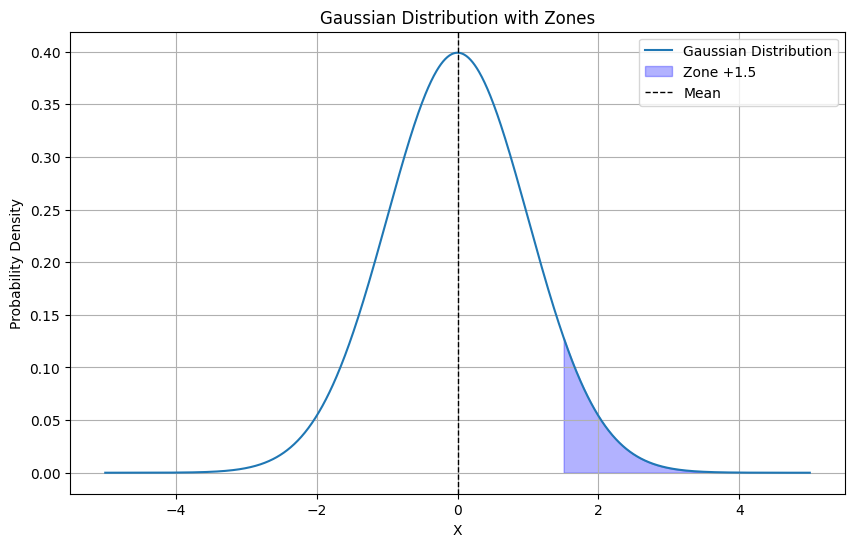

In [89]:
|import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for Gaussian distribution
mu = 0  # Mean
sigma = 1  # Standard deviation

# Generate data for the Gaussian distribution
x = np.linspace(-5, 5, 1000)
gaussian = norm.pdf(x, mu, sigma)

# Define the zones
delta = 1.5
zone_lower = mu - delta
zone_upper = mu + delta

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, gaussian, label='Gaussian Distribution')
plt.fill_between(x, 0, gaussian, where=(x >= zone_upper), color='blue', alpha=0.3, label=f'Zone +{delta}')
plt.title('Gaussian Distribution with Zones')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.axvline(x=mu, color='black', linestyle='--', linewidth=1, label='Mean')
plt.legend()
plt.grid(True)
plt.show()


In [107]:
np.mean([0.6905829596412556, 0.7219730941704036, 0.6053811659192825, 0.7432432432432432, 0.7072072072072072])

0.6936775340362784

Set all the cooking machine off when the time is between 0-10, 14-17, 21-24

In [19]:
ranges = [(0,10),(14,17),(21,24)]
# Initialize variables to hold the energy over-consumption for each category
energy_over_consumption_FISH = 0
energy_over_consumption_FRITES1 = 0
energy_over_consumption_FRITES2 = 0
energy_over_consumption_FRITES3 = 0
energy_over_consumption_HP_POULET1 = 0
energy_over_consumption_HP_POULET2 = 0
energy_over_consumption_POULET3 = 0
energy_over_consumption_POULET4 = 0
energy_over_consumption_POULET5 = 0
energy_over_consumption_COOKIES = 0
################################################
for r in ranges:
    for i in range(r[0],r[1]):
        subset_data = sub_datasets[i]['Friteuse Fish (Wh)']
        energy_over_consumption_FISH += np.sum(subset_data)
print("energy_over_consumption_FISH :",energy_over_consumption_FISH)
################################################
for r in ranges:
    for i in range(r[0],r[1]):
        subset_data = sub_datasets[i]['Friteuse Frites 1 (Wh)']
        energy_over_consumption_FRITES1 += np.sum(subset_data)
print("energy_over_consumption_FRITES1 :",energy_over_consumption_FRITES1)
################################################
for r in ranges:
    for i in range(r[0],r[1]):
        subset_data = sub_datasets[i]['Friteuse Frites 2 (Wh)']
        energy_over_consumption_FRITES2 += np.sum(subset_data)
print("energy_over_consumption_FRITES2 :",energy_over_consumption_FRITES2)

################################################
for r in ranges:
    for i in range(r[0], r[1]):
        subset_data = sub_datasets[i]['Friteuse Frites 3 (Wh)']
        energy_over_consumption_FRITES3 += np.sum(subset_data)
print("energy_over_consumption_FRITES3:", energy_over_consumption_FRITES3)

################################################
for r in ranges:
    for i in range(r[0], r[1]):
        subset_data = sub_datasets[i]['Friteuse HP Poulet 1 (Wh)']
        energy_over_consumption_HP_POULET1 += np.sum(subset_data)
print("energy_over_consumption_HP_POULET1:", energy_over_consumption_HP_POULET1)

################################################
for r in ranges:
    for i in range(r[0], r[1]):
        subset_data = sub_datasets[i]['Friteuse HP Poulet 2 (Wh)']
        energy_over_consumption_HP_POULET2 += np.sum(subset_data)
print("energy_over_consumption_HP_POULET2:", energy_over_consumption_HP_POULET2)

################################################
for r in ranges:
    for i in range(r[0], r[1]):
        subset_data = sub_datasets[i]['Friteuse Poulet 3 (Wh)']
        energy_over_consumption_POULET3 += np.sum(subset_data)
print("energy_over_consumption_POULET3:", energy_over_consumption_POULET3)

################################################
for r in ranges:
    for i in range(r[0], r[1]):
        subset_data = sub_datasets[i]['Friteuse Poulet 4 (Wh)']
        energy_over_consumption_POULET4 += np.sum(subset_data)
print("energy_over_consumption_POULET4:", energy_over_consumption_POULET4)

################################################
for r in ranges:
    for i in range(r[0], r[1]):
        subset_data = sub_datasets[i]['Friteuse Poulet 5 (Wh)']
        energy_over_consumption_POULET5 += np.sum(subset_data)
print("energy_over_consumption_POULET5:", energy_over_consumption_POULET5)

################################################
for r in ranges:
    for i in range(r[0], r[1]):
        subset_data = sub_datasets[i]['Four Cookies (Wh)']
        energy_over_consumption_COOKIES += np.sum(subset_data)
print("energy_over_consumption_COOKIES:", energy_over_consumption_COOKIES)

energy_over_consumption_FISH : 1827906.6899999997
energy_over_consumption_FRITES1 : 5507033.01
energy_over_consumption_FRITES2 : 836927.5499999999
energy_over_consumption_FRITES3: 1451344.4400000004
energy_over_consumption_HP_POULET1: 1208554.2
energy_over_consumption_HP_POULET2: 2443742.79
energy_over_consumption_POULET3: 3028563.84
energy_over_consumption_POULET4: 3050254.6500000004
energy_over_consumption_POULET5: 1688105.7600000002
energy_over_consumption_COOKIES: 1515903.2100000002


In [21]:
over_energy = [
energy_over_consumption_FISH,
energy_over_consumption_FRITES1,
energy_over_consumption_FRITES2,
energy_over_consumption_FRITES3,
energy_over_consumption_HP_POULET1,
energy_over_consumption_HP_POULET2,
energy_over_consumption_POULET3,
energy_over_consumption_POULET4,
energy_over_consumption_POULET5,
energy_over_consumption_COOKIES]

over_expense = sum(over_energy)*0.00027

In [23]:
sum(over_energy)

22558336.140000004

In [22]:
over_expense

6090.750757800001